In [1]:
from pathlib import Path
from collections import Counter
from multiprocessing import Pool, cpu_count
import numpy as np
import matplotlib.pyplot as plt
import music21 as m21

from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

In [2]:
def read_midi(file): 
    print("Loading Music File:",file)
    
    notes = []
    notes_to_parse = None
    
    # parsing a midi file
    midi = m21.converter.parse(file)
  
    # grouping based on different instruments
    s2 = m21.instrument.partitionByInstrument(midi)

    # Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            # finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, m21.note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, m21.chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

path = "./chopin/"
files = [p for p in Path(path).rglob("*") if p.is_file() and p.suffix == ".mid"]

notes = pool.map(read_midi, files)
notes_array = np.array(notes, dtype=object)

Loading Music File:Loading Music File:Loading Music File:Loading Music File:Loading Music File:Loading Music File:Loading Music File:Loading Music File:Loading Music File:Loading Music File:Loading Music File: Loading Music File:       chopin/chpn-p10.mid chopin/chpn_op35_1.mid  chopin/chpn-p24.midchopin/chpn-p17.midchopin/chpn-p20.mid
chopin/chpn-p8.midchopin/chpn_op7_2.midchopin/chpn_op27_1.mid
chopin/chpn_op66.mid
chopin/chpn_op27_2.mid 


chopin/chpn_op23.mid




chopin/chpn_op25_e1.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2002 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 1997 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn-p4.mid
Loading Music File: chopin/chpn-p18.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2002 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn-p2.mid

/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2002 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(



Loading Music File: chopin/chpn_op25_e11.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Et\xfcde Opus 25, No. 11'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Sturmet\xfcde'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn-p22.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2003 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn-p9.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 1997 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2002 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chp_op18.mid
Loading Music File: chopin/chpn-p12.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 1997 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chp_op31.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2003 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn-p19.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2002 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2003 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2002 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loading Music File:

/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 1999 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


 chopin/chpn_op10_e05.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Et\xfcde Opus 10 No. 5'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Schwarze-Tasten-Et\xfcde'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn_op25_e12.mid
Loading Music File: chopin/chpn-p23.mid
Loading Music File: chopin/chpn_op33_4.mid
Loading Music File: chopin/chpn_op10_e12.mid
Loading Music File: chopin/chpn-p16.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Et\xfcde Nr. 12'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn_op35_3.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 1999 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn_op53.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2003 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2002 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn-p21.mid
Loading Music File: chopin/chpn-p14.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 1999 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2002 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn-p5.mid
Loading Music File: chopin/chpn-p13.mid
Loading Music File: chopin/chpn-p11.mid
Loading Music File: chopin/chpn_op10_e01.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'Et\xfcde Opus 10 No. 5'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 1997 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn_op33_2.mid
Loading Music File: chopin/chpn-p7.mid
Loading Music File: chopin/chpn-p1.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2002 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn-p15.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2003 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn_op35_4.mid
Loading Music File: chopin/chpn-p3.mid
Loading Music File: chopin/chpn_op25_e4.mid
Loading Music File: chopin/chpn_op25_e2.mid
Loading Music File: chopin/chpn_op7_1.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2002 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn-p6.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2003 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2003 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


Loading Music File: chopin/chpn_op25_e3.mid
Loading Music File: chopin/chpn_op35_2.mid


/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2003 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2003 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2002 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(
/usr/lib/python3.9/site-packages/music21/midi/translate.py:785: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, trac

In [3]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

397


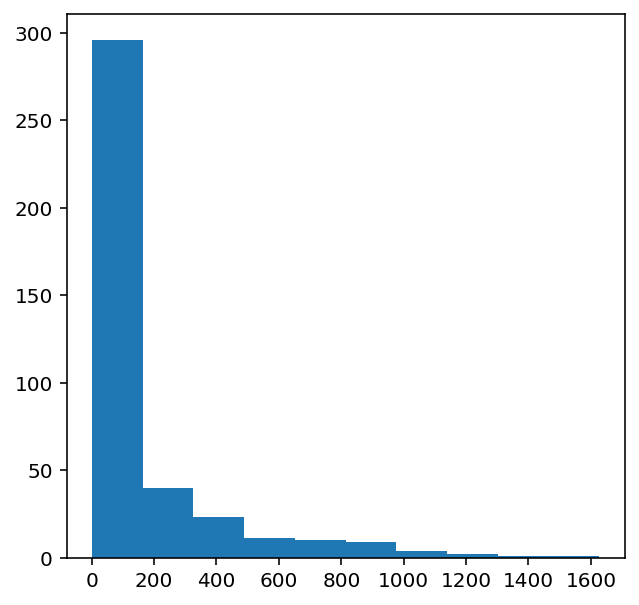

In [4]:
#computing frequency of each note
freq = dict(Counter(notes_))

#consider only the frequencies
no = [count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no);

In [5]:
frequent_notes = [note_ for note_, count in freq.items() if count>=10]
print(len(frequent_notes))

233


In [6]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music, dtype=object)

In [7]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        # preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x = np.array(x)
y = np.array(y)

unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

# preparing input sequences
x_seq = []

for i in x:
    temp = []
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq = np.array([y_note_to_int[i] for i in y])

In [8]:
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [9]:
K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           23300     
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

2021-12-06 17:42:54.468753: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-06 17:42:54.469466: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=50, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/50
349/350 [============================>.] - ETA: 0s - loss: 4.6191
Epoch 00001: val_loss improved from inf to 4.46469, saving model to best_model.h5
350/350 [==============================] - 37s 104ms/step - loss: 4.6191 - val_loss: 4.4647
Epoch 2/50
350/350 [==============================] - ETA: 0s - loss: 4.1417
Epoch 00002: val_loss improved from 4.46469 to 4.14020, saving model to best_model.h5
350/350 [==============================] - 35s 100ms/step - loss: 4.1417 - val_loss: 4.1402
Epoch 3/50
349/350 [============================>.] - ETA: 0s - loss: 3.9252
Epoch 00003: val_loss improved from 4.14020 to 4.01195, saving model to best_model.h5
350/350 [==============================] - 31s 88ms/step - loss: 3.9249 - val_loss: 4.0120
Epoch 4/50
349/350 [============================>.] - ETA: 0s - loss: 3.7794
Epoch 00004: val_loss improved from 4.01195 to 3.91846, saving model to best_model.h5
350/350 [==============================] - 36s 102ms/step - loss: 3.7793 - va

KeyboardInterrupt: 

In [11]:
ind = np.random.randint(0, len(x_val)-1)

random_music = x_val[ind]

predictions=[]

for i in range(10):
    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[135, 135, 135, 135, 135, 135, 135, 135, 135, 135]


In [12]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [13]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = m21.note.Note(cn)
                new_note.storedInstrument = m21.instrument.Piano()
                notes.append(new_note)
                
            new_chord = m21.chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = m21.note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = m21.instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = m21.stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

In [14]:
convert_to_midi(predicted_notes)

In [15]:
midi_file = "music.mid"

mf = m21.midi.MidiFile()
mf.open(midi_file)
mf.read()
mf.close()
s = m21.midi.translate.midiFileToStream(mf)
s.show('midi')